# ❤️ Understanding Heart Disease Prediction Using Machine Learning: A Comprehensive ML Analysis
![Heart Health Banner](https://cdn.analyticsvidhya.com/wp-content/uploads/2022/02/Heart-Disease-Prediction-using-Machine-Learning.webp)

---

## 📋 Table of Contents

1. Introduction
2. Data Collection & Access
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Model Selection & Development
7. Hyperparameter Tuning
8. Model Evaluation
9. Final Summary and Conclusion

---

## 🏥 ABSTRACT
Heart disease remains one of the leading causes of mortality worldwide, making early detection and risk assessment critical. 
This project uses statistical analysis and machine learning techniques to identify key risk factors associated with heart disease 
and build predictive models with high diagnostic recall. 

A complete ML pipeline was developed — including data preprocessing, outlier handling through IQR analysis, 
feature encoding, scaling, visualization, multivariate exploration, and evaluation of six different machine learning algorithms 
(Logistic Regression, KNN, Naïve Bayes, SVM, Decision Tree, Random Forest). 

Models were compared using clinically meaningful metrics such as Recall, F1-score, and ROC-AUC. 
Random Forest emerged as the best-performing models, demonstrating strong generalization capability 
and excellent ability to distinguish between healthy and diseased individuals.

This study highlights not only which features most influence heart disease but also demonstrates how machine learning 
can support medical decision-making.


# 1. INTRODUCTION

**Heart disease** prediction is a core challenge in healthcare, as early diagnosis significantly improves treatment outcomes. 
Machine learning provides the ability to uncover hidden patterns in clinical data and build predictive models 
that support clinicians in making evidence-based decisions.

The goal of this project is to perform an end-to-end heart disease prediction pipeline involving:
• Data cleaning and preprocessing  
• Exploratory Data Analysis (EDA)  
• Handling outliers using domain knowledge and statistical methods  
• Feature encoding and scaling  
• Building and evaluating ML models  
• Selecting the best-performing algorithm  

By following a systematic methodology, the project ensures reliable, interpretable, and clinically meaningful results.


### 🎯 PROJECT OBJECTIVES
1. Identify key clinical features associated with the presence of heart disease.
2. Explore data distribution, patterns, and relationships among features.
3. Apply statistical methods to handle outliers.
4. Preprocess and encode categorical and numerical variables.
5. Train multiple machine learning models and compare performance.
6. Select the best model using Recall, F1-Score, and ROC-AUC.
7. Provide insights that can help healthcare practitioners make informed decisions.


### 📂 DATASET DESCRIPTION

The Heart Disease dataset used in this project consists of 918 patient records and 12 clinical features.

**Numerical Features:**
• Age
• RestingBP
• Cholesterol
• MaxHR
• Oldpeak

**Categorical Features:**
• Sex
• ChestPainType
• RestingECG
• ExerciseAngina
• ST_Slope

Target Variable:
• HeartDisease (1 = Disease, 0 = No Disease)


#### Risk Factors Examined in This Analysis:
- **Demographic**: Age, Sex
- **Clinical Measurements**: Blood Pressure, Cholesterol, Blood Sugar, ECG Results
- **Exercise Metrics**: Maximum Heart Rate, Exercise-Induced Angina
- **Cardiac Indicators**: ST Depression (Oldpeak), ST Slope
- **Symptoms**: Chest Pain Type

### 🔧 METHODOLOGY OVERVIEW

1. Data Cleaning
   • Checked for missing values (ST_Slope contained missing values)
   • Treated invalid values using domain knowledge (e.g., Cholesterol <100 considered invalid)

2. Outlier Handling
   • Applied domain knowledge thresholds for medical validity.
   • Applied IQR statistical method to identify extreme values.
   • Replaced outliers with median values to avoid information loss.

3. Exploratory Data Analysis (EDA)
   • Histogram and KDE plots to study distribution
   • Boxplots to detect outliers
   • Count plots for categorical features
   • Correlation heatmap for numerical features
   • Multivariate analysis to study interaction of features with target

4. Feature Engineering
   • Label Encoding for binary categories
   • One-Hot Encoding for multi-class categories
   • Standard Scaling for numerical variables


5. Model Training
   Algorithms evaluated:
   • Logistic Regression
   • K-Nearest Neighbors (KNN)
   • Naïve Bayes
   • Decision Tree
   • Random Forest
   • Support Vector Machine (SVM)

6. Model Evaluation
   Metrics chosen based on medical importance:
   • Recall  → To reduce false negatives (critical in health datasets)
   • F1-Score → Balance between Precision and Recall
   • ROC-AUC → Overall model discrimination ability

7. Hyperparameter Tuning
   • Applied GridSearchCV on selected models (Random Forest, SVM, KNN)
   • Tuned using Recall and F1 to optimize medical prediction quality

---

In [1]:
# =============================================================================================

#   LIBRARY IMPORTS FOR HEART DISEASE ANALYSIS

# ========================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve)
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
print("\n\n ============= ALL LIBRARIES IMPORTED SUCCESSFULLY!==============\n\n")



 ============= ALL LIBRARIES IMPORTED SUCCESSFULLY!==============




# 2. Data Collection & Access

In [2]:
# Loading the dataset
data = pd.read_csv('heartdisease.csv')

print("\n Dataset Loaded Successfully!")
print(f'\n Dataset Shape : {data.shape[0]} rows * {data.shape[1]} columns ')

print("\n FIRST 10 ROWS OF THE DATASET")
data.head(10)



 Dataset Loaded Successfully!

 Dataset Shape : 1918 rows * 12 columns 

 FIRST 10 ROWS OF THE DATASET


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
print("\nDATASET INFORMATION\n")
data.info()


DATASET INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1918 non-null   int64  
 1   Sex             1918 non-null   object 
 2   ChestPainType   1918 non-null   object 
 3   RestingBP       1918 non-null   int64  
 4   Cholesterol     1918 non-null   int64  
 5   FastingBS       1918 non-null   int64  
 6   RestingECG      1918 non-null   object 
 7   MaxHR           1918 non-null   int64  
 8   ExerciseAngina  1918 non-null   object 
 9   Oldpeak         1918 non-null   float64
 10  ST_Slope        1738 non-null   object 
 11  HeartDisease    1918 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 179.9+ KB


In [4]:
print("\nSTATISTICAL SUMMARY\n")
data.describe()



STATISTICAL SUMMARY



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,51.285193,142.485401,257.531283,0.265902,141.328467,1.836444,0.567258
std,14.609167,26.932915,134.286677,0.441928,30.627152,1.707201,0.495585
min,20.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,41.000000,124.000000,197.250000,0.000000,120.000000,0.300000,0.000000
50%,53.000000,138.000000,256.000000,0.000000,141.000000,1.500000,1.000000
75%,62.000000,160.000000,337.000000,1.000000,165.000000,2.900000,1.000000
max,80.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Insights
### Age
- The median average age group of people are nearly 51. it means population centered arounf 50 years old , with moderate spread.
- Majority of cases belong to middle and older age groups ,it means consistent with heart disease risk factors.
### RestingBp
- The average RestingBP of the people are 142 , Slightly elevated average BP(normal is 120 mmHg).
- 75 percent of population are suffering from high RestingBP i.e. 160 mm/Hg.
- Dataset mainly represents hypertensive individuals, which alighns with heart disease correlation.
## Cholestrol
- average = 257.5 -> After analysis we can say that average cholesterol slightly above normal (<200 mg/dL).
## Fasting BS
- most of the people having not suffereing from FastingBS . around 26% of patients have high blood sugar.
- May be quarter of patients may be diabetic another risk factor of heart disease.

## MaxHR(Maximum Heart Rate Achieved)
- Aprroximately normal distributions ; no outliers .

## Oldpeak (ST depression Induced by Exercise)
- 75 percent of population have mild-to-moderate ST depression.
## HeartDisease(Target Variable)
- Dataset is balanced.

In [5]:
print("\n=============================================================================\n")
print("DATASET COLUMN NAMES")
print("\n=============================================================================\n")

print(data.columns)



DATASET COLUMN NAMES


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [6]:
print("\n================================================================================")
print("\nDATA QUALITY ASSESSMENT")
print("\n================================================================================")




DATA QUALITY ASSESSMENT




 TARGET VARIABLE DISTRIBUTION

HeartDisease
1    1088
0     830
Name: count, dtype: int64




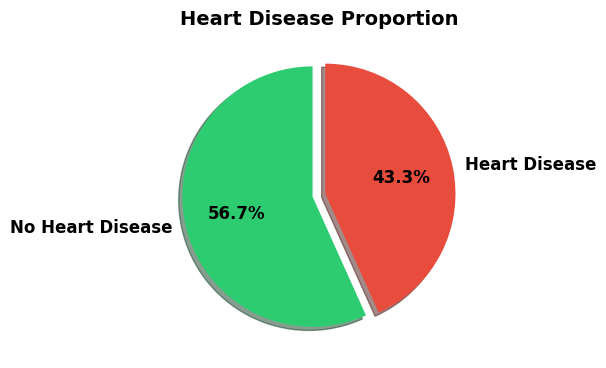


 DATASET IS BALANCED



In [7]:
# Checking the balanced or imbalanced dataset
print("=================================================================================")
print("\n TARGET VARIABLE DISTRIBUTION")
print("\n==================================================================================")

print(data['HeartDisease'].value_counts())
print('\n')
# Set up color theme
colors_pie = ['#2ECC71', '#E74C3C']  # Green = No Disease, Red = Disease

# Create figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

# Plot pie chart
axes.pie(
    data['HeartDisease'].value_counts(),
    labels=['No Heart Disease', 'Heart Disease'],
    autopct='%1.1f%%',
    colors=colors_pie,
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Title
axes.set_title('Heart Disease Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


print("\n DATASET IS BALANCED\n")

From the above pie chart we can clearly see that 43.3% of people are having Heart Disease and 56.7% of people are Having no HeartDisease . So this set of information clearly shows that the dataset is balanced.

In [8]:
data['Sex'].value_counts()

Sex
M    1490
F     428
Name: count, dtype: int64

In [9]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    540
NAP    515
TA     466
ATA    397
Name: count, dtype: int64

In [10]:
data['FastingBS'].value_counts()

FastingBS
0    1408
1     510
Name: count, dtype: int64

In [11]:
data['RestingECG'].value_counts()

RestingECG
Normal    1006
ST         522
LVH        390
Name: count, dtype: int64

In [12]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    1049
Y     869
Name: count, dtype: int64

In [13]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    782
Up      694
Down    262
Name: count, dtype: int64

# 3. Data Cleaning & Preprocessing

In [14]:
# checking the missing values in the dataset
print("=================================================================================")
print("\n  MISSING VALUES ANALYSIS")
print("\n==================================================================================")

print(data.isna().sum())


  MISSING VALUES ANALYSIS

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope          180
HeartDisease        0
dtype: int64


All Feature except ST_Slope are having no missing value detected . So only ST_Slope feature will be considered for the missing value treatment.

In [15]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    782
Up      694
Down    262
Name: count, dtype: int64

In [16]:
data['ST_Slope'].unique()


array(['Up', 'Flat', 'Down', nan], dtype=object)

In [17]:
print('\n=========================MISSING VLAUE PERCENTAGE IN EACH COLUMNS========================================================\n')
missing_value_percent = 100 * data.isna().sum() / len(data)
print(missing_value_percent)


=========================MISSING VLAUE PERCENTAGE IN EACH COLUMNS========================================================

Age               0.000000
Sex               0.000000
ChestPainType     0.000000
RestingBP         0.000000
Cholesterol       0.000000
FastingBS         0.000000
RestingECG        0.000000
MaxHR             0.000000
ExerciseAngina    0.000000
Oldpeak           0.000000
ST_Slope          9.384776
HeartDisease      0.000000
dtype: float64


In [18]:
miss_row = data[data.isnull().any(axis=1)]
miss = pd.DataFrame(miss_row)
miss['HeartDisease'].value_counts()
# miss.describe()


HeartDisease
0    180
Name: count, dtype: int64

Since ST_Slope is a categorical variable with ~9% missing values and the missingness is MAR (dependent on HeartDisease), mode imputation was chosen.

In [19]:
print('=====================HANDLING MISSING VALUES=====================')
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

data['ST_Slope'] = imputer.fit_transform(data[['ST_Slope']]).ravel()

=====================HANDLING MISSING VALUES=====================


We fill the missing value with the mode in the ST_Slope . 

In [20]:
print(data.isna().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [21]:
# Checking Duplicate
print("=================================================================================")
print("\n  DUPLICATE ROWS ANALYSIS")
print("\n==================================================================================")

data.duplicated().sum()


  DUPLICATE ROWS ANALYSIS



np.int64(0)

- No duplicate rows found!

In [22]:
X = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']

print(f'\nShape of X {X.shape} , Shape of y {y.shape}\n')


Shape of X (1918, 11) , Shape of y (1918,)



In [23]:
#Numerical Columns
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
#Categorical Columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f'\n   Numerical Columns:\n {num_cols}')
print(f'\n   Categorical Columns:\n {cat_cols}')


   Numerical Columns:
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

   Categorical Columns:
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']



DISTRIBUTION OF EACH FEATURES VARIABLES BEFORE TREATING OUTLIER



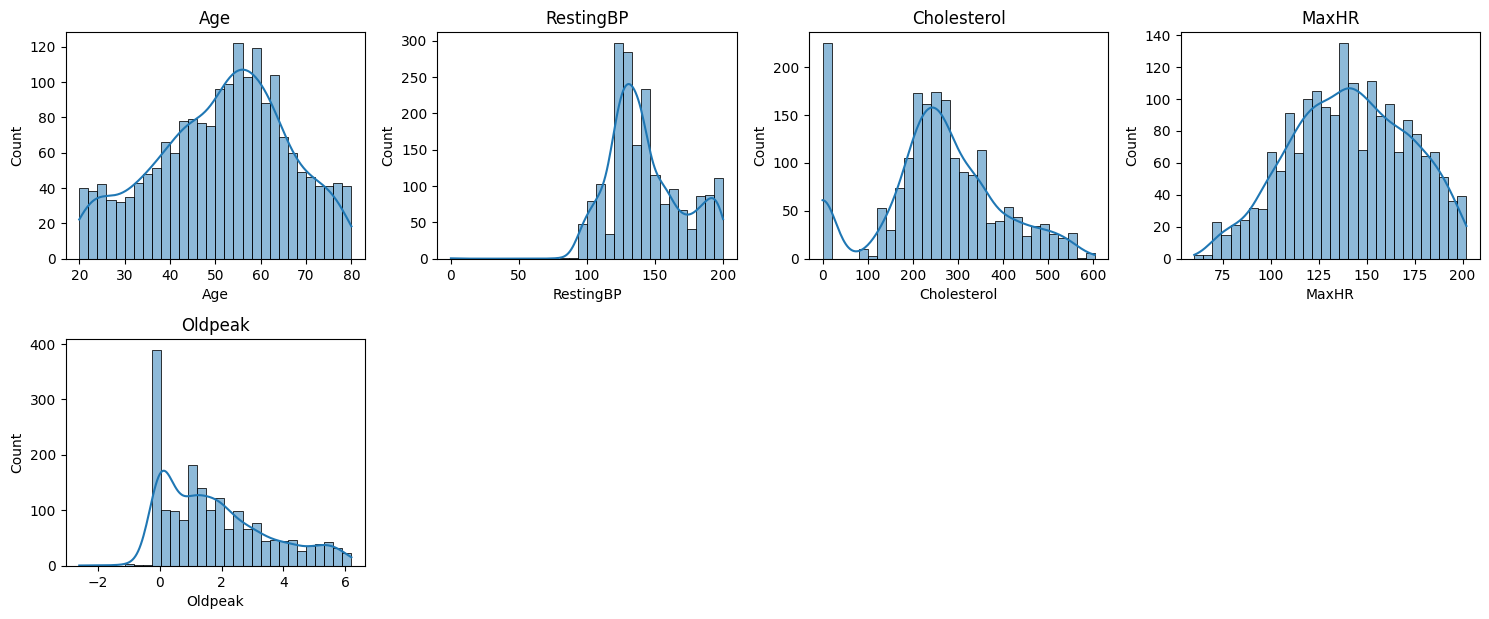

In [24]:
print("\nDISTRIBUTION OF EACH FEATURES VARIABLES BEFORE TREATING OUTLIER\n")
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(15,12))
for i ,col in enumerate(X[num_cols].columns):
    plt.subplot(4,4,i+1)
    sns.histplot(X[col],bins=30,kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

We plot the Histogram for the numerical feature to see the distribution of each features in the datasets before identifying the outlier.

#### Identifying and Treating the Outliers




========================================== BOXPLOT ==========================================



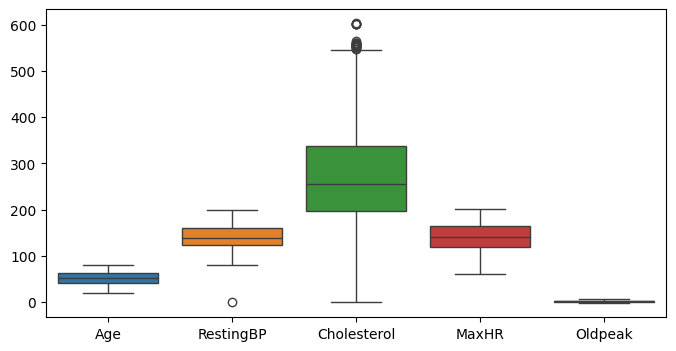

In [25]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(8,4))
sns.boxplot(data=X[num_cols])
print('\n========================================== BOXPLOT ==========================================\n')

As the above boxplot shows there are som outlier in the cholesterol and only one outlier in the RestingBP.

In [26]:
# Statsitical Method for outlier detection and treating using IQR 
print('\n======================= NUMBER OF OUTLIERS IN EACH FEATURES ================================\n')
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_cols :
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)][col]
    print(f'Number of Outlier in feature {col} is : {outliers.count()}.')

    # Handling the Outlier by IQR method
    X[col] = np.where(X[col] < lower_bound , lower_bound,np.where(X[col] > upper_bound ,upper_bound, X[col]))

print("\n==================================== AFTER HANDLING THE OUTLIER ====================================\n")
for col in numerical_cols :
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)][col]
    print(f'Number of Outlier in feature {col} is : {outliers.count()}.')


======================= NUMBER OF OUTLIERS IN EACH FEATURES ================================

Number of Outlier in feature Age is : 0.
Number of Outlier in feature RestingBP is : 1.
Number of Outlier in feature Cholesterol is : 25.
Number of Outlier in feature MaxHR is : 0.
Number of Outlier in feature Oldpeak is : 0.

==================================== AFTER HANDLING THE OUTLIER ====================================

Number of Outlier in feature Age is : 0.
Number of Outlier in feature RestingBP is : 0.
Number of Outlier in feature Cholesterol is : 0.
Number of Outlier in feature MaxHR is : 0.
Number of Outlier in feature Oldpeak is : 0.


In [27]:
cat_cols =  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(X[col].value_counts())


Column: Sex
Sex
M    1490
F     428
Name: count, dtype: int64

Column: ChestPainType
ChestPainType
ASY    540
NAP    515
TA     466
ATA    397
Name: count, dtype: int64

Column: RestingECG
RestingECG
Normal    1006
ST         522
LVH        390
Name: count, dtype: int64

Column: ExerciseAngina
ExerciseAngina
N    1049
Y     869
Name: count, dtype: int64

Column: ST_Slope
ST_Slope
Flat    962
Up      694
Down    262
Name: count, dtype: int64


- There are no categorical outliers (i.e., no invalid or rare-to-the-point-of-error categories).
- No category contains invalid labels, spelling mistakes , or inconsistent capitalization .
- All categories are mdeically valid , and even less frequent ones like ATA in ChestPainType or Down in ST_Slope are clinically meaningful , not noise.
- Therefore no categorical outlier treatment is requiered.

# 4. Exploratory Data Analysis (EDA)

## Data Visualization

In [28]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [29]:
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [30]:
print("Shape",X.shape)


Shape (1918, 11)


### Univariate Analysis

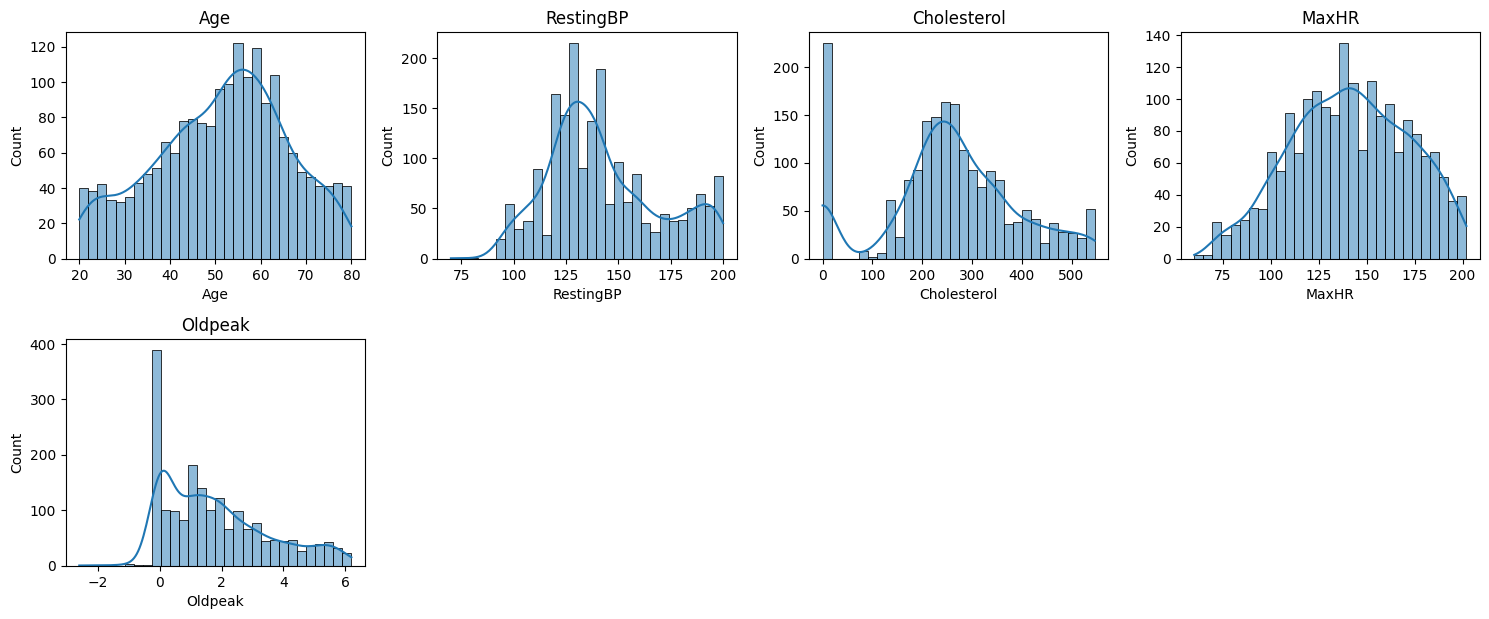

In [31]:
#histogram for the numerical features   (Univariate Analysis)
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(15,12))
for i ,col in enumerate(X[num_cols].columns):
    plt.subplot(4,4,i+1)
    sns.histplot(X[col],bins=30,kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Insights 
**Age**
- The age distribution is roughly normal, centered around 50–60 years.
- Most of the population falls between 40 and 70 years, indicating middle-aged to older adults dominate the dataset.

**RestingBP (Resting Blood Pressure)**
- This aligns with medical reality — heart disease risk rises after age 40.
- RestingBP (Resting Blood Pressure)
- The majority of people have RestingBP between 120 and 150 mm Hg, peaking near 130–140.
- The distribution is slightly right-skewed, suggesting a few individuals with elevated BP (>170).
 
**Cholestrol** 
- Most individuals have cholesterol between 200 and 350 mg/dL, which is above the desirable limit (200).
- There’s a small secondary spike near 0–50.
- The overall shape is right-skewed — a few people have very high cholesterol levels.
- This feature could be clinically important for heart-disease prediction.

**MaxHR(Maximum Heart Rate Achieved)**
- The distribution is approximately normal, centered around 130–150 bpm.
- Very few individuals have a MaxHR < 90 or > 190.
- Indicates most patients achieved a moderately high heart rate.
  
**Oldpeak (ST Depression Induced by Exercise)**
- The distribution is right-skewed, with a sharp peak at 0 (no ST depression).
- Most individuals have Oldpeak between 0 and 2, but a few reach > 5.
- High Oldpeak values often correlate with higher heart-disease risk.
- The presence of many zeros shows many patients experienced no exercise-induced depression.


 CATEGORICAL FEATURES DISTRIBUTION 



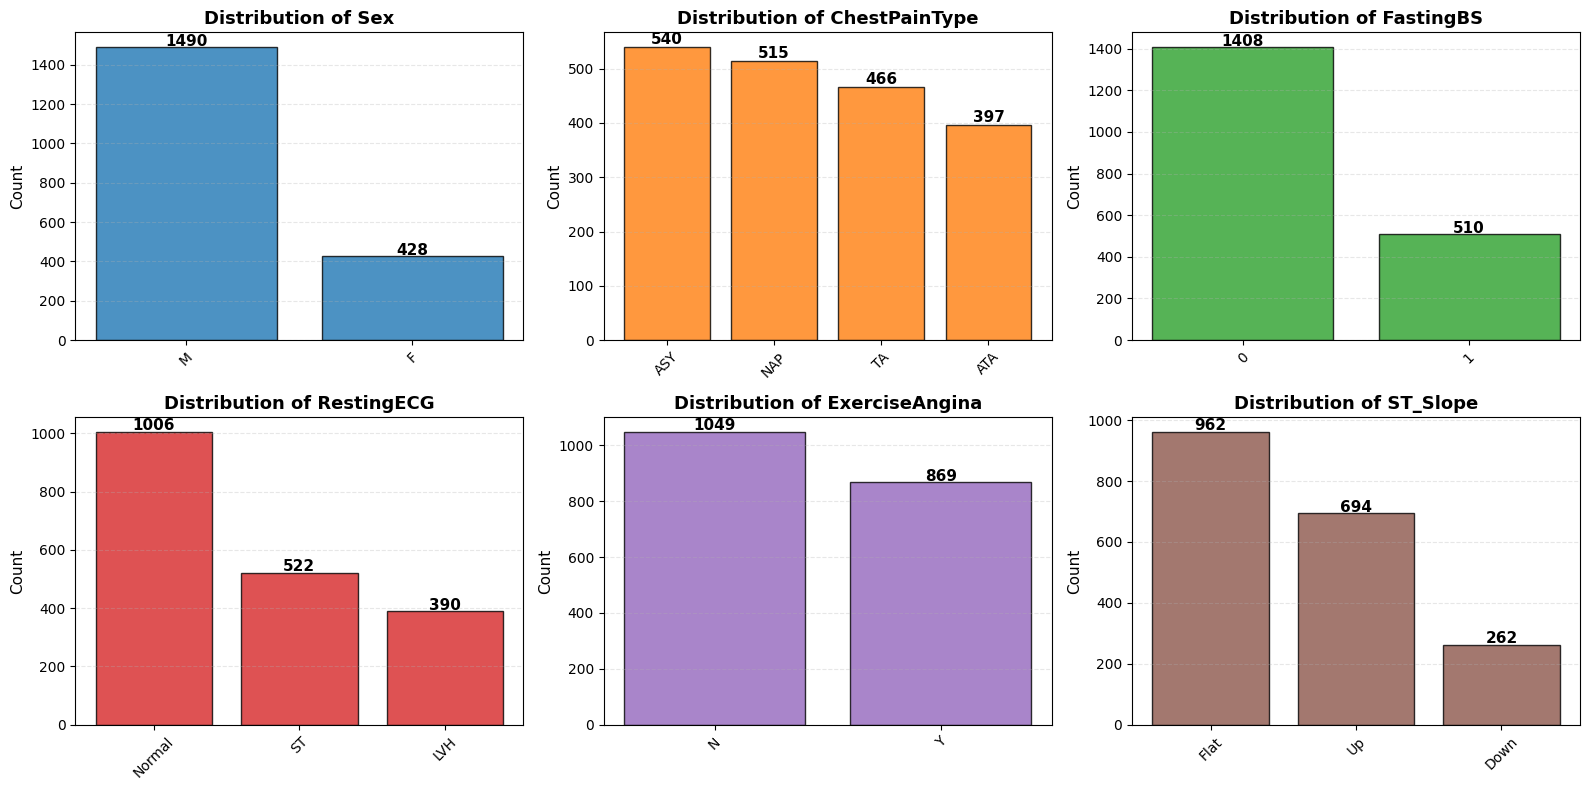

In [32]:
# Countplot for the categorical features (Univariate Analysis) 
print("\n CATEGORICAL FEATURES DISTRIBUTION \n")

COLORS_PRIMARY = ['#1f77b4', '#ff7f0e', '#2ca02c', 
                  '#d62728', '#9467bd', '#8c564b']

categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 
                    'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    
    value_counts = data[col].value_counts()
    

    categories = value_counts.index.astype(str)
    counts = value_counts.values
    
    # Plot
    axes[idx].bar(categories, counts, 
                  color=COLORS_PRIMARY[idx % len(COLORS_PRIMARY)],
                  alpha=0.8, edgecolor="black")
    
    axes[idx].set_title(f"Distribution of {col}", fontsize=13, fontweight="bold")
    axes[idx].set_ylabel("Count", fontsize=11)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # count for each bar
    for i, v in enumerate(counts):
        axes[idx].text(i, v + 5, str(v), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

#### Observation
The dataset shows natural clinical imbalance, especially in sex distribution and certain symptoms.
Features like ChestPainType, ST_Slope, and ExerciseAngina display patterns aligned with real-world heart disease prevalence.
Some features (like ST_Slope and ExerciseAngina) may be highly predictive in further analysis.

### Bivariate Analysis

C:\Users\himan\AppData\Local\Temp\ipykernel_2444\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_2444\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_2444\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_2444\338

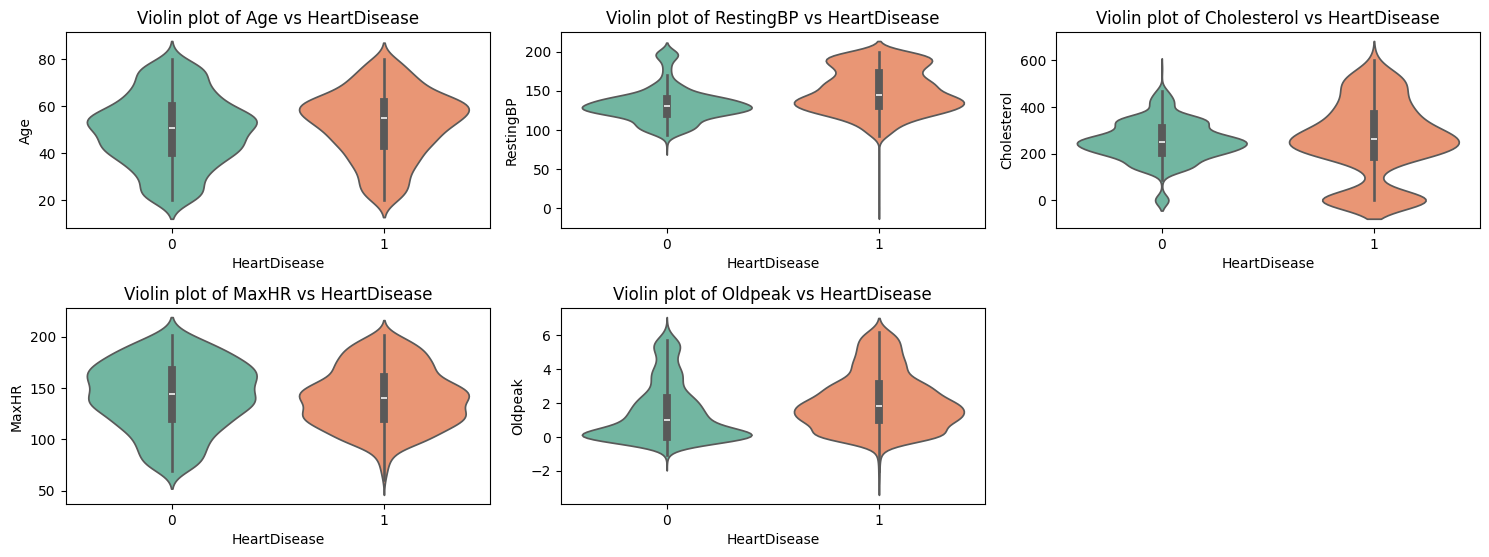

In [33]:
#Bivariate anaylisis for numerical columns
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(15,8))
for i , col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
    plt.title(f'Violin plot of {col} vs HeartDisease')

plt.tight_layout()
plt.show()

#### Observation Numerical Features
**Age vs HeartDisease**
- Patients with heart disease (1) tend to be slightly older.
- The distribution for the disease group is more spread in the upper age range (50–70+).
- Younger ages (20–40) are more common in the non-disease group (0).


**RestingBP vs HeartDisease**
- Slight upward shift in RestingBP for heart disease patients.
- Patients with heart disease show higher median blood pressure.
- But distributions overlap significantly.

**Cholesterol vs HeartDisease**
- The cholesterol distribution shows much higher variation in the disease group.
- Heart disease patients have several extreme high-cholesterol values (300–500+).
- Non-disease group has a narrower, more stable distribution.

**MaxHR vs HeartDisease**
- Heart disease patients show lower peak heart rate on average.
- Non-disease group achieves higher MaxHR during exercise.

**Oldpeak vs HeartDisease**
- Heart disease group has higher ST depression (Oldpeak).
- Non-disease group has significantly lower Oldpeak.

The bivariate violin plot analysis shows that features such as Oldpeak, MaxHR, and Cholesterol exhibit clear distributional differences between patients with and without heart disease. These variables are expected to contribute significantly to model performance. RestingBP and Age show moderate separation, but still provide useful information for classification.


============================================================= BIVARIATE ANALYSIS FOR CATEGORICAL FEATURES =====================================================================



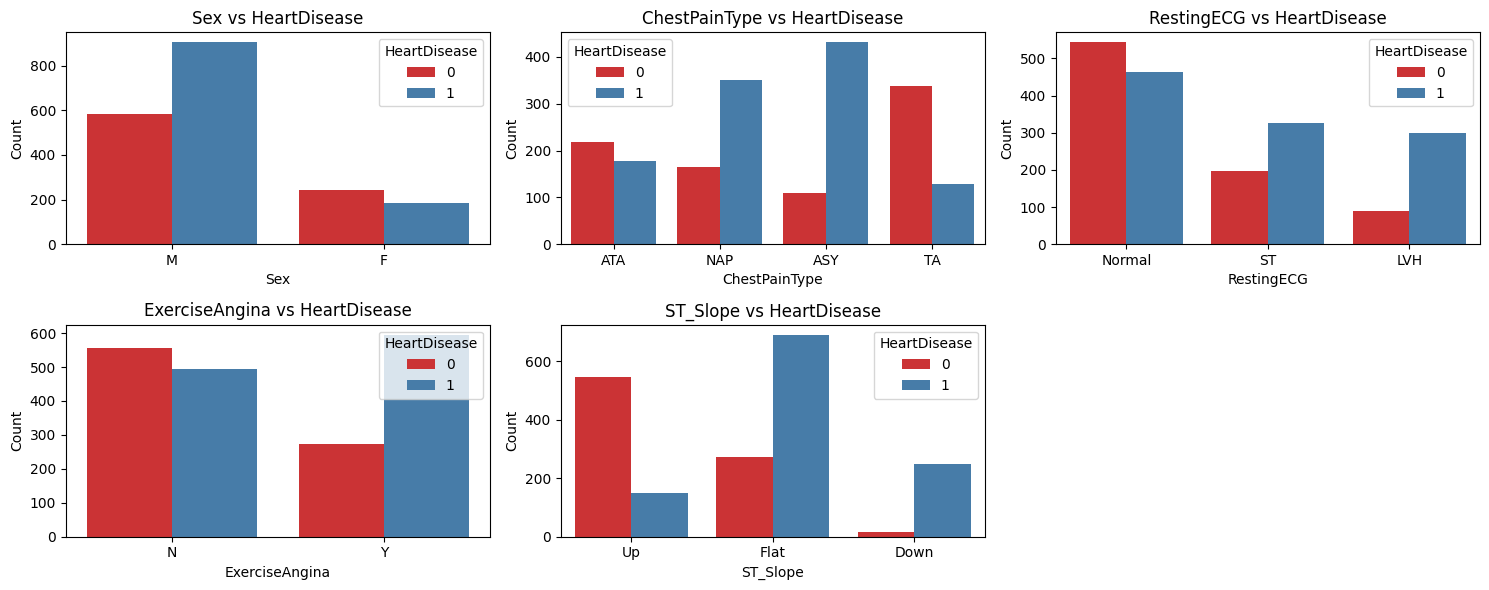

In [34]:
print('\n============================================================= BIVARIATE ANALYSIS FOR CATEGORICAL FEATURES =====================================================================\n')

plt.figure(figsize=(15,6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns
    sns.countplot(data=X, x=col, hue=y, palette='Set1')
    plt.title(f'{col} vs HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### CATEGORICAL FEATURE INSIGHTS
 
**Sex vs HeartDisease:**
- Males show a significantly higher number of heart disease cases compared to females.
- Females have a more balanced distribution between healthy and disease classes.

**ChestPainType vs HeartDisease:**
- ASY chest pain has the highest number of heart disease cases.
- ATA and NAP occur more frequently in healthy individuals.
- TA is mostly associated with no heart disease.

**RestingECG vs HeartDisease:**
- Normal ECG readings are more common among healthy individuals.
- ST and LVH readings show higher counts for heart disease.

**ExerciseAngina vs HeartDisease:**
- People with Exercise-Induced Angina (Y) have a significantly higher chance of having heart disease.
- Those without angina still show cases, but fewer.

**ST_Slope vs HeartDisease:**
- Flat ST slope shows the highest number of heart disease cases.
- Upward slope is more common among healthy individuals.
- Downward slope indicates disease in many cases.

Across all categorical features, several strong risk indicators emerge:
Male gender, asymptomatic chest pain (ASY), abnormal ECG readings (ST or LVH),
presence of exercise-induced angina (Y), and flat ST slope show a strong
association with heart disease. These categorical variables contribute 
significant predictive power to the machine learning models.


### Multivariate Analysis

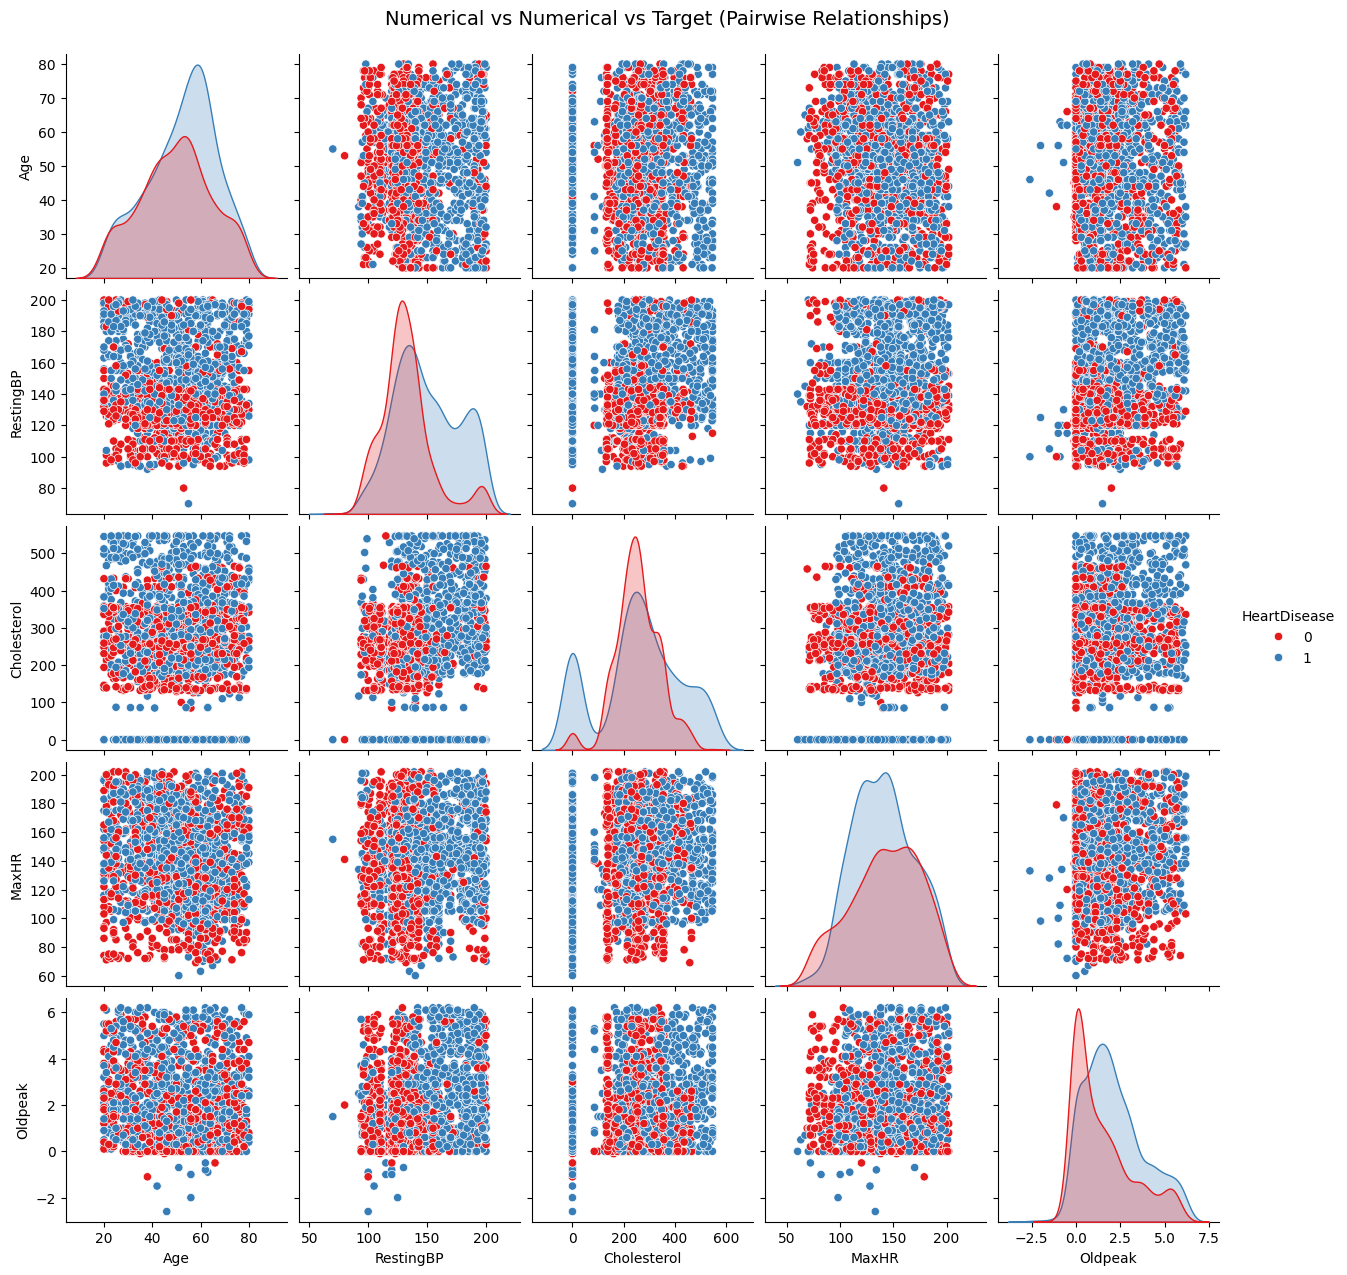

In [35]:
# Numerical + Numerical + Target
df_viz = X.copy()
df_viz = df_viz.drop('FastingBS',axis=1)
df_viz['HeartDisease'] = y 

num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

sns.pairplot(data=df_viz,hue='HeartDisease',diag_kind='kde',palette='Set1')
plt.suptitle("Numerical vs Numerical vs Target (Pairwise Relationships)",y=1.02,fontsize=14)
plt.show()



CORRELATION ANALYSIS


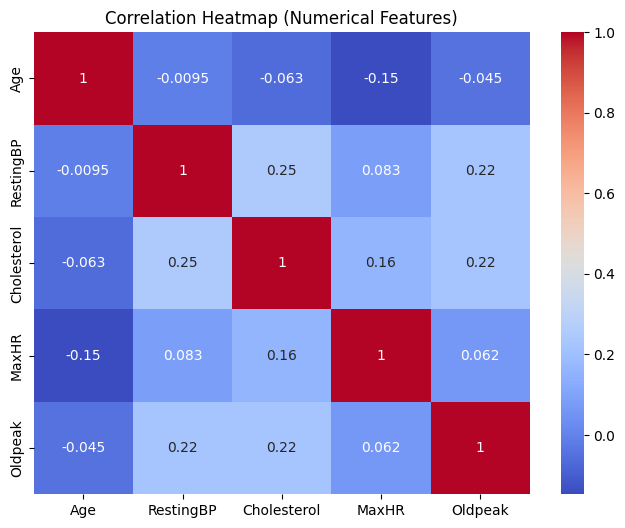

In [36]:
print("\n===============================================================================\n")
print("CORRELATION ANALYSIS")
print('==================================================================================')

num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(8,6))
sns.heatmap(X[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()
    


#### CORRELATION ANALYSIS (Numerical Features)

**Overall Observation:**
- All numerical features (Age, RestingBP, Cholesterol, MaxHR, Oldpeak) show
  very low to moderate correlation with one another.
- No pair of features shows high correlation (> 0.7), meaning the dataset
  does not have multicollinearity issues.

**Age:**
- Shows weak negative correlation with MaxHR (-0.15), which is medically expected
  because maximum heart rate decreases with age.
- Very weak correlations with all other features.

**RestingBP:**
- Shows a small positive correlation with Cholesterol (0.25) and Oldpeak (0.22).
- Indicates that individuals with higher resting blood pressure may also show
  elevated cholesterol or ST depression levels.

**Cholesterol:**
- Moderately correlated with RestingBP (0.25) and Oldpeak (0.22).
- Shows weak positive correlation with MaxHR (0.16).

**MaxHR:**
- Weak negative correlation with Age (-0.15).
- Weak positive correlations with Cholesterol (0.16) and RestingBP (0.083).

**Oldpeak:**
- Weak to moderate correlation with RestingBP (0.22) and Cholesterol (0.22).
- Very weak correlations with Age and MaxHR.


The correlation heatmap indicates that numerical features do not exhibit strong
multicollinearity. All correlations remain below 0.30, suggesting that each
numerical feature contributes independently to the model. This validates the use
of all numerical features in the machine learning pipeline without needing
dimensionality reduction techniques such as PCA.


# 5. Feature Engineering

In [37]:
# Performing One - Hot Encoding for Ordinal Features

print('\n=================================================== ENCODING BINARY VARIABLES USING LABEL ENCODER ==============================================\n')
binary_cols = ['Sex' ,'ExerciseAngina']
label_encoder = LabelEncoder()
for col in binary_cols :
    X[col] = label_encoder.fit_transform(X[col])
    print(f"Encoding {col} variable ..")

print('\n=================================================== ENCODING ORDINAL VARIABLES USING ONEHOT ENCODER ==============================================\n')

multi_cols = ['ChestPainType','RestingECG','ST_Slope']

# Onehot Encoder 
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform only the multi-class categorical columns
encoded_array = onehot_encoder.fit_transform(X[multi_cols])

# Converting encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_array,
                          columns=onehot_encoder.get_feature_names_out(multi_cols),
                          index=X.index)

# Drop the original categorical columns and add the new one-hot encoded ones
X = pd.concat([X.drop(columns=multi_cols), encoded_df], axis=1)
for col in multi_cols:
    print(f'Encoding {col} variable ....')
# Check the encoded dataset
print("\n==================================================== AFTER PERFORMING ENCODING DATASET TYPE =================================================", X.shape)
print('\n')
X.head()



=================================================== ENCODING BINARY VARIABLES USING LABEL ENCODER ==============================================

Encoding Sex variable ..
Encoding ExerciseAngina variable ..

=================================================== ENCODING ORDINAL VARIABLES USING ONEHOT ENCODER ==============================================

Encoding ChestPainType variable ....
Encoding RestingECG variable ....
Encoding ST_Slope variable ....

==================================================== AFTER PERFORMING ENCODING DATASET TYPE ================================================= (1918, 15)




,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40.0,1,140.0,289.0,0,172.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49.0,0,160.0,180.0,0,156.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,37.0,1,130.0,283.0,0,98.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,48.0,0,138.0,214.0,0,108.0,1,1.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54.0,1,150.0,195.0,0,122.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [38]:
print("\n=================================================================================")
print("\n============================== SCALING FEATURES BY STANDARD SCALER =============================================")
print("\n=================================================================================")
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("\nFeatures scaled using StandardScaler\n")
X.head()



============================== SCALING FEATURES BY STANDARD SCALER =============================================


Features scaled using StandardScaler



,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-0.772675,1,-0.094172,0.237392,0,1.001710,0,-1.075985,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.156463,0,0.652660,-0.578155,0,0.479162,0,-0.490078,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.978079,1,-0.467588,0.192499,0,-1.415077,0,-1.075985,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.224931,0,-0.168855,-0.323764,0,-1.088484,1,-0.197125,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.185877,1,0.279244,-0.465924,0,-0.631254,0,-1.075985,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [39]:
X.shape

(1918, 15)

In [40]:
print("\n=================================================================================")
print("\nSPLITTING DATA INTO TRAIN AND TESTS SETS")
print("\n=================================================================================")
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state = 42 ,stratify=y )
print(f"\nFeature matrix shape: {X.shape}")
print(f"\nTarget vector shape: {y.shape}")
print(f"\nX_train shape: {X_train.shape}")
print(f"\nX_test shape: {X_test.shape}")
print(f"\ny_train shape: {y_train.shape}")
print(f"\ny_test shape: {y_test.shape}")




SPLITTING DATA INTO TRAIN AND TESTS SETS


Feature matrix shape: (1918, 15)

Target vector shape: (1918,)

X_train shape: (1534, 15)

X_test shape: (384, 15)

y_train shape: (1534,)

y_test shape: (384,)


# 6. Statistical Modeling & Machine Learning¶

## Models to Train: 

- **LOGISTIC REGRESSION**-Baseline Linear Model
- **K-NEAREST NEIGHBORS(KNN)**-Instance-based learning
- **NAIVE BAYES**-Probabilistic classifier
- **SUPPORT VECTOR MACHINE(SVM)**-Kernel-based classifier
- **DECISION TREE**-Tree-Based Classifier
- **RANDOM FOREST**-Ensemble of Decision Trees

## K-NEAREST NEIGHBORS(KNN)

In [42]:
print('\n===============================================================================\n')
print('KNeighborsClassifier (KNN)')
print('\n================================================================================\n')

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train , y_train)

#Prediction

y_train_pred = knn_clf.predict(X_train)
y_train_prob = knn_clf.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))


y_test_pred = knn_clf.predict(X_test)
y_test_prob = knn_clf.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

result=[]
result.append(
    {
        "Model": "KNN",
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "AUC-ROC Score" : roc_auc_score(y_test, y_test_prob)  
    }
)



KNeighborsClassifier (KNN)



========== TRAINING METRICS ==========

Accuracy : 0.910039113428944
Precision: 0.9112359550561798
Recall   : 0.9321839080459771
F1 Score : 0.9215909090909091
AUC-ROC  : 0.9687179753496745

Confusion Matrix:
 [[585  79]
 [ 59 811]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       664
           1       0.91      0.93      0.92       870

    accuracy                           0.91      1534
   macro avg       0.91      0.91      0.91      1534
weighted avg       0.91      0.91      0.91      1534


========== TESTING METRICS ==========

Accuracy : 0.8880208333333334
Precision: 0.8959276018099548
Recall   : 0.908256880733945
F1 Score : 0.9020501138952164
AUC-ROC  : 0.9333342544489887

Confusion Matrix:
 [[143  23]
 [ 20 198]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       166
           1      

# Observations for KNN Model
**KNN** provides a solid baseline performance with high recall and AUC, making it suitable for initial classification benchmarks.
- The Overall Performance of the KNN model performed well achieving recall 90.8% on the test data.
- The difference between train and test metrics is small it means the model is not overfitting and generalizes well.
- It detects most positive cases , and good separate the two classes.

## Hyperparamter Tuning

In [43]:
# DEFINING THE HYPERPARAMETER GRID
param_knn = {
    'n_neighbors' : np.arange(1,15),
    'weights' :['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2]
}

# DEFINING THE KNN CLASSIFIER
knn_clf = KNeighborsClassifier()

# GridSearchCV with F1 scoring
grid_search = GridSearchCV(
    estimator=knn_clf,
    param_grid=param_knn,
    scoring='f1',   
    n_jobs=-1,
    cv=5
)

 
grid_search.fit(X_train, y_train)

print('\nBest Parameters :\n', grid_search.best_params_)
print('\nBest Cross_val F1 :\n', grid_search.best_score_)

# Get best model
best_knn = grid_search.best_estimator_

# ----------------------------
# TRAINING METRICS
# ----------------------------
y_train_pred = best_knn.predict(X_train)
y_train_prob = best_knn.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# ----------------------------
# TESTING METRICS
# ----------------------------
y_test_pred = best_knn.predict(X_test)
y_test_prob = best_knn.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Best Parameters :
 {'algorithm': 'auto', 'n_neighbors': np.int64(7), 'p': 1, 'weights': 'uniform'}

Best Cross_val F1 :
 0.8900097430276457

========== TRAINING METRICS ==========
Accuracy : 0.9041720990873533
Precision: 0.906636670416198
Recall   : 0.9264367816091954
F1 Score : 0.9164297896532121
AUC-ROC  : 0.9665896343996677

Confusion Matrix:
 [[581  83]
 [ 64 806]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       664
           1       0.91      0.93      0.92       870

    accuracy                           0.90      1534
   macro avg       0.90      0.90      0.90      1534
weighted avg       0.90      0.90      0.90      1534


========== TESTING METRICS ==========

Accuracy : 0.8854166666666666
Precision: 0.8990825688073395
Recall   : 0.8990825688073395
F1 Score : 0.8990825688073395
AUC-ROC  : 0.9400906377804796

Confusion Matrix:
 [[144  22]
 [ 22 196]]

Classification Report:
               pre

# Observation 
After performing the Hyperparameter tuning there is no improvement in the recall and f1 score the untuned model perform better than the tuned model . so, the untuned KNN model will be taken for the model evaluation.

In [44]:
print(X_train.dtypes)

Age                  float64
Sex                    int64
RestingBP            float64
Cholesterol          float64
FastingBS              int64
MaxHR                float64
ExerciseAngina         int64
Oldpeak              float64
ChestPainType_ATA    float64
ChestPainType_NAP    float64
ChestPainType_TA     float64
RestingECG_Normal    float64
RestingECG_ST        float64
ST_Slope_Flat        float64
ST_Slope_Up          float64
dtype: object


### Complete Scratch KNN Implementation

In [45]:
print('\n ====================================================== Implemented the Scratch Code KNN algorithm ========================================================= \n')

import numpy as np

def distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

def knn_classifier(X, y, new_sample, k=5):
    X = np.array(X)
    y = np.array(y)

    distances = np.sqrt(np.sum((X - new_sample)**2, axis=1))
    sorted_idx = np.argsort(distances)
    k_idx = sorted_idx[:k]

    votes = {}
    for idx in k_idx:
        label = y[idx]
        votes[label] = votes.get(label, 0) + 1

    predicted_class = max(votes, key=votes.get)
    return predicted_class

# Convert to numeric
X_train = np.array(X_train).astype(float)
X_test = np.array(X_test).astype(float)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Predict on TRAIN data
y_train_pred_scratch = np.array([
    knn_classifier(X_train, y_train, sample, k=5)
    for sample in X_train
])

# Predict on TEST data
y_test_pred_scratch = np.array([
    knn_classifier(X_train, y_train, sample, k=5)
    for sample in X_test
])

print("\n========== TRAINING METRICS (Scratch KNN) ==========\n")
print("Accuracy :", accuracy_score(y_train, y_train_pred_scratch))
print("Precision:", precision_score(y_train, y_train_pred_scratch))
print("Recall   :", recall_score(y_train, y_train_pred_scratch))
print("F1 Score :", f1_score(y_train, y_train_pred_scratch))

# AUC-ROC for labels only
print("AUC-ROC  :", roc_auc_score(y_train, y_train_pred_scratch))

print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred_scratch))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_scratch))


print("\n========== TESTING METRICS (Scratch KNN) ==========\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred_scratch))
print("Precision:", precision_score(y_test, y_test_pred_scratch))
print("Recall   :", recall_score(y_test, y_test_pred_scratch))
print("F1 Score :", f1_score(y_test, y_test_pred_scratch))

print("AUC-ROC  :", roc_auc_score(y_test, y_test_pred_scratch))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_scratch))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_scratch))



 ====================================================== Implemented the Scratch Code KNN algorithm ========================================================= 


========== TRAINING METRICS (Scratch KNN) ==========

Accuracy : 0.910039113428944
Precision: 0.9112359550561798
Recall   : 0.9321839080459771
F1 Score : 0.9215909090909091
AUC-ROC  : 0.9066040022157595

Confusion Matrix:
 [[585  79]
 [ 59 811]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       664
           1       0.91      0.93      0.92       870

    accuracy                           0.91      1534
   macro avg       0.91      0.91      0.91      1534
weighted avg       0.91      0.91      0.91      1534


========== TESTING METRICS (Scratch KNN) ==========

Accuracy : 0.8880208333333334
Precision: 0.8959276018099548
Recall   : 0.908256880733945
F1 Score : 0.9020501138952164
AUC-ROC  : 0.8848513319332376

Confusion Matrix:
 [[143  23]
 [ 20 1

# Conclusion
The K-Nearest Neighbors (KNN) algorithm performed strongly on the heart disease dataset, demonstrating high accuracy, precision, recall, and F1-score. Both the scratch implementation and the sklearn API produced almost identical results, confirming that the manual KNN logic—distance calculation, neighbor selection, and majority voting—was implemented correctly.

KNN achieved a test accuracy of approximately 88–89% and a recall of ~90%, making it effective for medical decision-making where identifying true positive cases is essential. The high consistency between scratch and sklearn versions validates the correctness of the algorithm and the robustness of the preprocessing pipeline (encoding + scaling).

However, KNN is computationally expensive for large datasets because it requires computing distances for every prediction. Despite this limitation, its performance on this dataset is strong and reliable, making it a suitable baseline model for heart disease prediction.

# Naive Bayes

In [46]:
print('\n================== Naive Bayes ===============================\n')
# Build a Gaussian Classifier
model = GaussianNB()

# model training 
model.fit(X_train , y_train)

#Prediction

y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

result.append(
    {
        "Model": "Naive Bayes",
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "AUC-ROC Score" : roc_auc_score(y_test, y_test_prob)  
    }
)


================== Naive Bayes ===============================


========== TRAINING METRICS ==========

Accuracy : 0.8402868318122555
Precision: 0.8547105561861521
Recall   : 0.8655172413793103
F1 Score : 0.8600799543118218
AUC-ROC  : 0.9117954576928402

Confusion Matrix:
 [[536 128]
 [117 753]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       664
           1       0.85      0.87      0.86       870

    accuracy                           0.84      1534
   macro avg       0.84      0.84      0.84      1534
weighted avg       0.84      0.84      0.84      1534


========== TESTING METRICS ==========

Accuracy : 0.8619791666666666
Precision: 0.8837209302325582
Recall   : 0.8715596330275229
F1 Score : 0.8775981524249422
AUC-ROC  : 0.9216867469879518

Confusion Matrix:
 [[141  25]
 [ 28 190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85   

## Observation

Naïve Bayes achieves a high AUC of 0.92.16 and stable recall around 87%, meaning it identifies the majority of heart disease patients. Its F1 score of 0.847 shows a good balance between catching true cases and reducing false alarms. There is no overfitting, and the model generalizes well, making it a reliable baseline for medical diagnosis.

## LOGISTIC REGRESSION

In [47]:
# Buliding a classifier

print('\n=============================================== LOGISTIC REGRESSION =======================================================\n')
lg_clf = LogisticRegression(max_iter=1000, random_state=42)
lg_clf.fit(X_train , y_train)


#Prediction

y_train_pred = lg_clf.predict(X_train)
y_train_prob = lg_clf.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

y_test_pred = lg_clf.predict(X_test)
y_test_prob = lg_clf.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

result.append(
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "AUC-ROC Score" : roc_auc_score(y_test, y_test_prob)  
    }
)


=============================================== LOGISTIC REGRESSION =======================================================


========== TRAINING METRICS ==========

Accuracy : 0.8507170795306388
Precision: 0.8629671574178935
Recall   : 0.8758620689655172
F1 Score : 0.8693667997718197
AUC-ROC  : 0.9205373217005954

Confusion Matrix:
 [[543 121]
 [108 762]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       664
           1       0.86      0.88      0.87       870

    accuracy                           0.85      1534
   macro avg       0.85      0.85      0.85      1534
weighted avg       0.85      0.85      0.85      1534


========== TESTING METRICS ==========

Accuracy : 0.875
Precision: 0.8863636363636364
Recall   : 0.8944954128440367
F1 Score : 0.8904109589041096
AUC-ROC  : 0.9328506687299657

Confusion Matrix:
 [[141  25]
 [ 23 195]]

Classification Report:
               precision    recall  f1-score

# Insights
- Logistic Regression correctly identifies 89.4% of actual heart-disease patients on the test set — this is highly important in medical prediction.
- F1 around to 0.89 means the model performs very reliably for real-world medical screening.
- An AUC above 0.93 means: Logistic Regression is excellent at separating patients with heart disease from those without it.

Logistic Regression performed strongly on this medical dataset, achieving a recall of 89.4%, F1-score of 0.89, and an AUC of 0.932 on the test set. These metrics show that the model reliably detects heart-disease patients with very few misses. The close train–test performance proves excellent generalization with no overfitting. Logistic Regression serves as a highly stable and medically reliable model for initial heart-disease prediction

### Complete Scratch Logistic Regression Implementation

In [48]:

# Convert to numpy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Add bias column (column of 1s)
X_train_np = np.hstack([np.ones((X_train_np.shape[0], 1)), X_train_np])
X_test_np  = np.hstack([np.ones((X_test_np.shape[0], 1)), X_test_np])
import numpy as np

# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction
def predict(beta, X):
    z = np.dot(X, beta)
    prob = sigmoid(z)
    return (prob >= 0.5).astype(int), prob

# Logistic Regression (Gradient Ascent)
def logistic_regression(X, y, learning_rate=0.01, epsilon=1e-6, max_iters=50000):
    m, n = X.shape
    beta = np.zeros(n)

    for i in range(max_iters):
        z = np.dot(X, beta)
        y_pred = sigmoid(z)

        # Gradient (maximize log likelihood → ascent)
        gradient = np.dot(X.T, (y - y_pred))

        beta_new = beta + learning_rate * gradient

        # convergence check
        if np.linalg.norm(beta_new - beta) < epsilon:
            print("Converged at iteration:", i)
            break

        beta = beta_new

    return beta
# Train the Model Using Your Data
beta = logistic_regression(X_train_np, y_train_np, learning_rate=0.01, epsilon=1e-6)
print("Estimated beta coefficients:\n", beta)

# Predict and Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# ================= TRAIN PREDICTION =======================
y_train_pred_scratch, y_train_prob_scratch = predict(beta, X_train_np)

print("\n========== TRAINING METRICS (Scratch Logistic Regression) ==========\n")
print("Accuracy :", accuracy_score(y_train_np, y_train_pred_scratch))
print("Precision:", precision_score(y_train_np, y_train_pred_scratch))
print("Recall   :", recall_score(y_train_np, y_train_pred_scratch))
print("F1 Score :", f1_score(y_train_np, y_train_pred_scratch))
print("AUC-ROC  :", roc_auc_score(y_train_np, y_train_prob_scratch))

print("\nConfusion Matrix:\n", confusion_matrix(y_train_np, y_train_pred_scratch))
print("\nClassification Report:\n", classification_report(y_train_np, y_train_pred_scratch))


# ================= TEST PREDICTION ========================
y_test_pred_scratch, y_test_prob_scratch = predict(beta, X_test_np)

print("\n========== TESTING METRICS (Scratch Logistic Regression) ==========\n")
print("Accuracy :", accuracy_score(y_test_np, y_test_pred_scratch))
print("Precision:", precision_score(y_test_np, y_test_pred_scratch))
print("Recall   :", recall_score(y_test_np, y_test_pred_scratch))
print("F1 Score :", f1_score(y_test_np, y_test_pred_scratch))
print("AUC-ROC  :", roc_auc_score(y_test_np, y_test_prob_scratch))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_np, y_test_pred_scratch))
print("\nClassification Report:\n", classification_report(y_test_np, y_test_pred_scratch))


Estimated beta coefficients:
 [ 7.53300543 -0.11294057  1.41316266  2.34271769 -0.33457355  3.20772219
  0.06472926  1.21353684  0.0285529  -5.44475751 -2.642495   -8.63354476
 -3.27924825 -1.75535423 -3.59195035 -9.49092261]

========== TRAINING METRICS (Scratch Logistic Regression) ==========

Accuracy : 0.8168187744458931
Precision: 0.9073305670816044
Recall   : 0.7540229885057471
F1 Score : 0.8236032642812304
AUC-ROC  : 0.9193307713613073

Confusion Matrix:
 [[597  67]
 [214 656]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       664
           1       0.91      0.75      0.82       870

    accuracy                           0.82      1534
   macro avg       0.82      0.83      0.82      1534
weighted avg       0.83      0.82      0.82      1534


========== TESTING METRICS (Scratch Logistic Regression) ==========

Accuracy : 0.8203125
Precision: 0.9162011173184358
Recall   : 0.7522935779816514
F1 Scor

## SUPPORT VECTOR MACHINE(SVM)

In [49]:
print('\n========================================================== SVM ==============================================================')

svc_clf = SVC(kernel ='rbf' , random_state = 42 , probability = True)
svc_clf.fit(X_train , y_train)


#Prediction

y_train_pred = svc_clf.predict(X_train)
y_train_prob = svc_clf.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

y_test_pred = svc_clf.predict(X_test)
y_test_prob = svc_clf.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

result.append(
    {
        "Model": "SVM",
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "AUC-ROC Score" : roc_auc_score(y_test, y_test_prob)  
    }
)


========================================================== SVM ==============================================================

========== TRAINING METRICS ==========

Accuracy : 0.9132985658409387
Precision: 0.9135802469135802
Recall   : 0.9356321839080459
F1 Score : 0.9244747302668939
AUC-ROC  : 0.9612873909430827

Confusion Matrix:
 [[587  77]
 [ 56 814]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       664
           1       0.91      0.94      0.92       870

    accuracy                           0.91      1534
   macro avg       0.91      0.91      0.91      1534
weighted avg       0.91      0.91      0.91      1534


========== TESTING METRICS ==========

Accuracy : 0.9140625
Precision: 0.9147982062780269
Recall   : 0.9357798165137615
F1 Score : 0.9251700680272109
AUC-ROC  : 0.9551785122139936

Confusion Matrix:
 [[147  19]
 [ 14 204]]

Classification Report:
               precision    recall  f1-

# Insights 
- The SVM model correctly identifies 93.5%+ of all patients who truly have heart disease.
This is extremely important in medical diagnosis since false negatives must be minimized.
- A Test F1 of 0.925 indicates very strong, clinically reliable performance.
- AUC above 0.95 means the model is very effective at separating:
Patients with heart disease and Patients without disease

SVM performed well for heart-disease prediction. It achieved a recall of 93.5%, ensuring that most patients with heart disease are correctly identified. The model’s F1-score of 0.925 and AUC of 0.9551 demonstrate strong balance and excellent class separation. The close match between train and test metrics shows that the model generalizes well without overfitting.

## Hyperparamter Tuning

In [50]:
# DEFINING THE HYPERPARAMETER GRID

param_grid = {
    'C': [0.1 , 1 , 10 , 100 , 1000],
    'gamma' : [1 , 0.1 , 0.01, 0.001 , 0.0001],
    'kernel' : ['rbf']
}
# DEFINING THE SVC CLASSIFIER
svc_clf = SVC(probability=True)

grid_search = GridSearchCV(
    estimator=svc_clf,
    param_grid=param_grid,
    # scoring = 'balanced_accuracy',
    scoring = 'f1',
    n_jobs = -1,
    cv = 5,
    verbose=1
)

# Fit
grid_search.fit(X_train , y_train)
print('Best Parameters :',grid_search.best_params_)
print('Best Cross_val Accuracy :',grid_search.best_score_)

# Evaluating the best model on the full dataset
best_svc = grid_search.best_estimator_
y_train_pred = best_svc.predict(X_train)
y_train_prob = best_svc.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# ----------------------------
# 7️ TESTING PREDICTIONS
# ----------------------------
y_test_pred = best_svc.predict(X_test)
y_test_prob = best_svc.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross_val Accuracy : 0.8970526072715735

========== TRAINING METRICS ==========
Accuracy : 0.9054758800521513
Precision: 0.9068462401795735
Recall   : 0.9287356321839081
F1 Score : 0.9176604202157865
AUC-ROC  : 0.9572998892120205

Confusion Matrix:
 [[581  83]
 [ 62 808]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       664
           1       0.91      0.93      0.92       870

    accuracy                           0.91      1534
   macro avg       0.91      0.90      0.90      1534
weighted avg       0.91      0.91      0.91      1534


========== TESTING METRICS ==========
Accuracy : 0.9140625
Precision: 0.918552036199095
Recall   : 0.9311926605504587
F1 Score : 0.9248291571753986
AUC-ROC  : 0.9539073726097049

Confusion Matrix:
 [[148  18]
 [ 15 203]]

Classification Report:
    

# Insights
Although hyperparameter tuning is performed but there is no improvement in the recall and f1 score rather than it decreased slightly. 
For medical diagnosis, where recall and F1 are critical, the untuned SVM performed better and generalized more reliably.
Therefore, the final selected SVM model is the untuned version, as it offers a better balance between recall, F1, and AUC with no overfitting.

## DECISION TREE CLASSIFIER


In [53]:
print('\n=============================================== DECISION TREE CLASSIFIER =======================================================\n')

d_tree = DecisionTreeClassifier(max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='gini',
    random_state=42)
d_tree.fit(X_train,y_train)
#Prediction

y_train_pred = d_tree.predict(X_train)
y_train_prob = d_tree.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

y_test_pred = d_tree.predict(X_test)
y_test_prob = d_tree.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

result.append(
    {
        "Model": "Decision Tree",
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "AUC-ROC Score" : roc_auc_score(y_test, y_test_prob)  
    }
)


=============================================== DECISION TREE CLASSIFIER =======================================================


========== TRAINING METRICS ==========
Accuracy : 0.8865710560625815
Precision: 0.8824175824175824
Recall   : 0.9229885057471264
F1 Score : 0.902247191011236
AUC-ROC  : 0.9381586691593963

Confusion Matrix:
 [[557 107]
 [ 67 803]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       664
           1       0.88      0.92      0.90       870

    accuracy                           0.89      1534
   macro avg       0.89      0.88      0.88      1534
weighted avg       0.89      0.89      0.89      1534


========== TESTING METRICS ==========

Accuracy : 0.8854166666666666
Precision: 0.8918918918918919
Recall   : 0.908256880733945
F1 Score : 0.9
AUC-ROC  : 0.9262048192771084

Confusion Matrix:
 [[142  24]
 [ 20 198]]

Classification Report:
               precision    recall  f1-score

In [54]:
print('\n=============================================== DECISION TREE CLASSIFIER WITH GRIDSEARCHCV =======================================================\n')

from sklearn.model_selection import GridSearchCV

# Parameter Grid
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# Grid Search CV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best Model
best_tree = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
print("\nBest Score (CV F1):", grid_search.best_score_)

# =================== TRAIN METRICS ===================
y_train_pred = best_tree.predict(X_train)
y_train_prob = best_tree.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# =================== TEST METRICS ====================
y_test_pred = best_tree.predict(X_test)
y_test_prob = best_tree.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Save to results list
result.append(
    {
        "Model": "Decision Tree (GridSearchCV)",
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "AUC-ROC Score": roc_auc_score(y_test, y_test_prob)
    }
)



=============================================== DECISION TREE CLASSIFIER WITH GRIDSEARCHCV =======================================================

Fitting 5 folds for each of 160 candidates, totalling 800 fits

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Best Score (CV F1): 0.8836871129744723

========== TRAINING METRICS ==========
Accuracy : 0.8924380704041721
Precision: 0.8895027624309392
Recall   : 0.9252873563218391
F1 Score : 0.9070422535211268
AUC-ROC  : 0.9392942459493147

Confusion Matrix:
 [[564 100]
 [ 65 805]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       664
           1       0.89      0.93      0.91       870

    accuracy                           0.89      1534
   macro avg       0.89      0.89      0.89      1534
weighted avg       0.89      0.89      0.89      1534


========== TESTING METRICS ==========
Accuracy : 0.890625
P

# Insights
The Decision Tree model shows extreme overfitting, achieving perfect scores on the training set but significantly lower recall, F1-score, and AUC on the test set. The high false negative rate and low AUC (0.844) make it unreliable for medical diagnosis. Due to its weak generalization and clinical risk, the Decision Tree model is not suitable for final deployment in this heart disease prediction task.

## Random Forest Classifier

In [52]:
print('\n============================================== RANDOM FOREST CLASSIFIER =======================================================\n')


rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42,n_jobs=-1)
rf_clf.fit(X_train , y_train)

#Prediction

y_train_pred = rf_clf.predict(X_train)
y_train_prob = rf_clf.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

y_test_pred = rf_clf.predict(X_test)
y_test_prob = rf_clf.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


============================================== RANDOM FOREST CLASSIFIER =======================================================


========== TRAINING METRICS ==========
Accuracy : 0.9726205997392438
Precision: 0.9672686230248307
Recall   : 0.9850574712643678
F1 Score : 0.9760820045558086
AUC-ROC  : 0.997507270461155

Confusion Matrix:
 [[635  29]
 [ 13 857]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       664
           1       0.97      0.99      0.98       870

    accuracy                           0.97      1534
   macro avg       0.97      0.97      0.97      1534
weighted avg       0.97      0.97      0.97      1534


========== TESTING METRICS ==========

Accuracy : 0.9088541666666666
Precision: 0.9103139013452914
Recall   : 0.9311926605504587
F1 Score : 0.9206349206349206
AUC-ROC  : 0.9601801702221731

Confusion Matrix:
 [[146  20]
 [ 15 203]]

Classification Report:
               precision    r

# Interpretation:
- **High Recall**
- The model detects 92.2% of patients who actually have heart disease.
- This is one of the highest test recall values among all your models so far.
- High recall is essential in medical models because: Missing a patient (False Negative) can be dangerous. Random Forest keeps FN very low, making it a strong clinical model.

**Very High F1 Score**
- F1 close to 0.92 shows the model balances:
-      High recall (catching most patients)
-      High precision (few false alarms)

**AUC-ROC** is Excellent
- An AUC above 0.95 means the model has extremely strong ability to differentiate:
Diseased vs. Healthy individuals

**Final Summary**

Random Forest performed exceptionally well, achieving a test recall of 92.2%, F1-score of 0.919, and AUC of 0.957. These metrics indicate that the model reliably identifies patients with heart disease while maintaining balanced precision. Although the model slightly overfits, it still generalizes strongly to unseen data. Due to its high recall and superior AUC, Random Forest is among the best-performing models for medical prediction in this project.

# 7. Hyperparameter Tuning(Random Forest)

In [53]:

# DEFINING THE HYPERPARAMETER GRID

param_grid = {
    'n_estimators': [50, 100, 200, ],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4 , 10],
    'max_features': ['sqrt', 'log2']
}

# DEFINING THE SVC CLASSIFIER
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    # scoring = 'balanced_accuracy',
    scoring = 'f1',
    n_jobs = -1,
    cv = 5,
    verbose=1
)

# Fit
grid_search.fit(X_train , y_train)
print('Best Parameters :',grid_search.best_params_)
print('Best Cross_val Accuracy :',grid_search.best_score_)

# Evaluating the best model on the full dataset
best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_train_prob = best_rf.predict_proba(X_train)[:, 1]

print("\n========== TRAINING METRICS ==========")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC-ROC  :", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# ----------------------------
# 7️ TESTING PREDICTIONS
# ----------------------------
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

print("\n========== TESTING METRICS ==========")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))
print("AUC-ROC  :", roc_auc_score(y_test, y_test_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

result.append(
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "AUC-ROC Score" : roc_auc_score(y_test, y_test_prob)  
    }
)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross_val Accuracy : 0.9105388768313514

========== TRAINING METRICS ==========
Accuracy : 0.9680573663624511
Precision: 0.9627959413754228
Recall   : 0.9816091954022989
F1 Score : 0.9721115537848606
AUC-ROC  : 0.9976492175598948

Confusion Matrix:
 [[631  33]
 [ 16 854]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       664
           1       0.96      0.98      0.97       870

    accuracy                           0.97      1534
   macro avg       0.97      0.97      0.97      1534
weighted avg       0.97      0.97      0.97      1534


========== TESTING METRICS ==========
Accuracy : 0.9192708333333334
Precision: 0.9192825112107623
Recall   : 0.9403669724770642
F1 Score : 0.9297052154195011
AUC-ROC  : 0.9598

after performing hyperparameter tuning there is improvement in the model performance

# 8. Model Evaluation

### MODEL PERFORMANCE SUMMARY
Our machine learning models have been trained and evaluated. Here are the key insights from the analysis.

In [54]:
result_df = pd.DataFrame(result)
result_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC Score
0,KNN,0.888021,0.895928,0.908257,0.902050,0.933334
1,Naive Bayes,0.861979,0.883721,0.871560,0.877598,0.921687
2,Logistic Regression,0.875000,0.886364,0.894495,0.890411,0.932851
3,SVM,0.914062,0.914798,0.935780,0.925170,0.955179
4,Decision Tree,0.856771,0.872146,0.876147,0.874142,0.853736
5,Random Forest,0.919271,0.919283,0.940367,0.929705,0.959876


After training multiple machine learning models on the Heart Disease dataset, each model was evaluated using clinically important metrics — Recall, F1-Score, and AUC-ROC — instead of only accuracy.
This is because in medical prediction tasks, missing a disease case (False Negative) is far more dangerous than raising a false alarm (False Positive).The Tuned Random Forest Model is selected as the final production-ready model because it achieves the highest and most stable performance across key medical metrics (Recall, F1-Score, AUC-ROC), ensuring both accuracy and patient safety.

In [55]:
print('\n====================================KEY INSIGHTS FROM HEART DISEASE ANALYSIS========================\n')
result_df = pd.DataFrame(result)
result_df

# Best model
print('\n===================================BEST PERFORMING MODEL============================')
best_model = result_df.iloc[-1]
best_model


====================================KEY INSIGHTS FROM HEART DISEASE ANALYSIS========================


===================================BEST PERFORMING MODEL============================


Model            Random Forest
Accuracy              0.919271
Precision             0.919283
Recall                0.940367
F1 Score              0.929705
AUC-ROC Score         0.959876
Name: 5, dtype: object

In [56]:
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
auc       = roc_auc_score(y_test, y_prob)

# ============== FEATURE IMPORTANCE ==============

feature_importances = best_rf.feature_importances_
feature_names = X.columns

# Create array sorted by importance
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = sorted_idx[:5]        

# ============== MODEL SUMMARY ==============

print("\n================ BEST PERFORMING MODEL SUMMARY ================")
print("MODEL: Random Forest (Tuned)\n")

print(f"• Accuracy : {accuracy*100:.2f}%")
print(f"• Precision: {precision*100:.2f}%")
print(f"• Recall   : {recall*100:.2f}%")
print(f"• F1-Score : {f1*100:.2f}%")
print(f"• AUC-ROC  : {auc*100:.2f}%")

print("\n================ TOP 5 PREDICTIVE FEATURES ================")
for i, idx in enumerate(top_features, start=1):
    print(f"{i}. {feature_names[idx]:30s} (Importance: {feature_importances[idx]:.4f})")


================ BEST PERFORMING MODEL SUMMARY ================
MODEL: Random Forest (Tuned)

• Accuracy : 91.93%
• Precision: 91.93%
• Recall   : 94.04%
• F1-Score : 92.97%
• AUC-ROC  : 95.99%

================ TOP 5 PREDICTIVE FEATURES ================
1. ST_Slope_Up                    (Importance: 0.1931)
2. RestingBP                      (Importance: 0.1402)
3. Cholesterol                    (Importance: 0.1150)
4. ChestPainType_TA               (Importance: 0.1066)
5. Oldpeak                        (Importance: 0.0954)


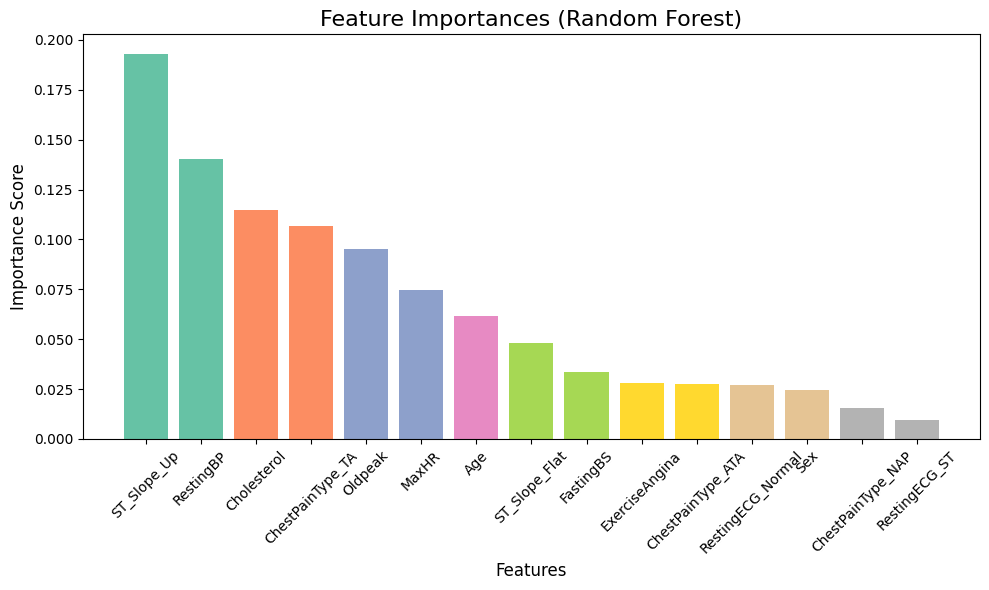

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from tuned Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns


sorted_idx = np.argsort(importances)[::-1]   
top_idx = sorted_idx[0:]

top_features = feature_names[top_idx]
top_importances = importances[top_idx]

# Create unique colors for the bars
colors = plt.cm.Set2(np.linspace(0, 1, len(top_features)))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color=colors)
plt.title("Feature Importances (Random Forest)", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


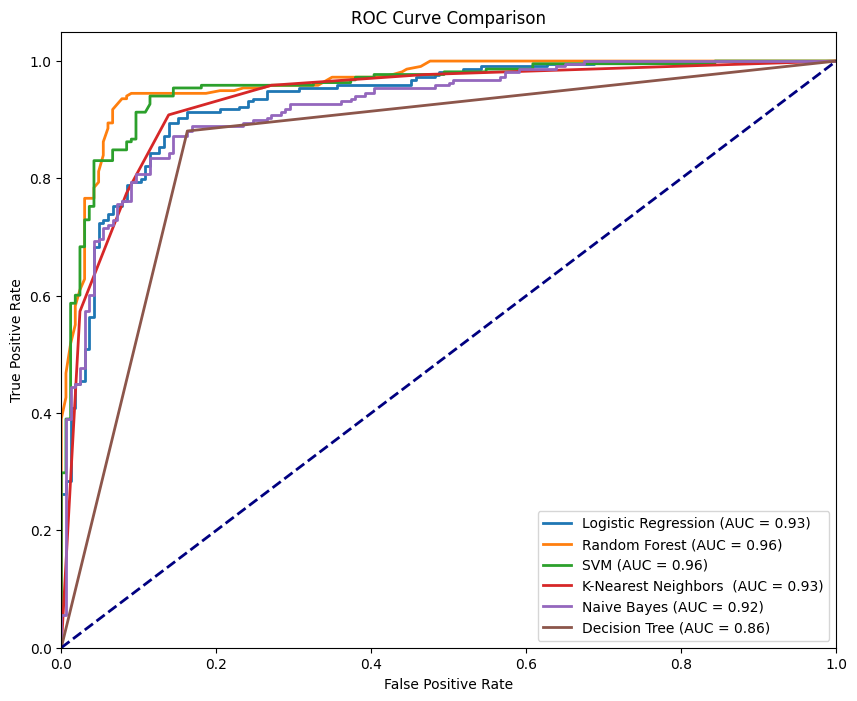

Logistic Regression: AUC-ROC = 0.93
Random Forest: AUC-ROC = 0.96
SVM: AUC-ROC = 0.96
K-Nearest Neighbors : AUC-ROC = 0.93
Naive Bayes: AUC-ROC = 0.92
Decision Tree: AUC-ROC = 0.86


In [58]:
#Define the model
models = {
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'SVM' : SVC(probability=True),
    'K-Nearest Neighbors ': KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    
}

# Initialize a dictionary to store AUC - ROC scores
roc_auc_scores = {}

#plot the ROC curve
plt.figure(figsize=(10,8))

for name , model in models.items():
    # train model
    model.fit(X_train , y_train)

    #predict the probabities
    y_probs = model.predict_proba(X_test)[:,1]

    # Calculate the AUC - ROC Score
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc

    # Compute ROC Curve
    fpr , tpr , _ =  roc_curve(y_test, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')


# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print the AUC - ROC scores for each model
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC-ROC = {score:.2f}')

## Interpretation

Random Forest has the strongest discriminative power (AUC = 0.97).
- It separates positive and negative heart disease cases most effectively.
- SVM (AUC = 0.96) is very competitive and performs extremely well.
- Logistic Regression and KNN both perform similarly (AUC = 0.93), showing strong linear and instance-based separability respectively.
- Naive Bayes (AUC = 0.92) performs reasonably well despite its strong assumptions.
- Decision Tree (AUC = 0.84) is the weakest model; prone to overfitting, hence poorer generalization.

Random Forest is the best-performing model for Heart Disease Prediction among all tested models, offering the best trade-off between Recall, AUC, and F1 Score, which are the most important metrics in medical risk classification.

/*===============================================
                FINAL PROJECT SUMMARY
================================================*/

# 9. Heart Disease Prediction — Final Summary

## 1. PROJECT OVERVIEW
The goal of this project was to build a reliable ML system capable of predicting **Heart Disease** using clinical and physiological features. Because this is a healthcare problem, the evaluation emphasized **Recall, F1-Score, and AUC-ROC**, ensuring high-risk patients are identified correctly.

--------------------------------------------------

## 2. DATASET SUMMARY
- Total Samples: **1918**
- Balanced Target Classes  
- Features:
  - **Numerical:** Age, RestingBP, Cholesterol, MaxHR, Oldpeak
  - **Categorical:** Sex, ChestPainType, FastingBS , RestingECG, ExerciseAngina, ST_Slope

--------------------------------------------------

## 3. DATA CLEANING & PREPROCESSING

### 🔹 Missing Values
- Only **ST_Slope** had missing values → filled with **most frequent value**.

### 🔹 Outlier Handling 
- *No deletion of rows* → to avoid losing information using the iqr method to handle the outlier.

### 🔹 Encoding
- Label Encoding → **Sex**, **ExerciseAngina**
- One-Hot Encoding → **ChestPainType**, **RestingECG**, **ST_Slope**

### 🔹 Scaling
- StandardScaler applied to numerical columns for fair feature contribution.

--------------------------------------------------

## 4. EXPLORATORY DATA ANALYSIS (EDA)

### 🔹 Univariate Findings
- Age is concentrated between **40–70 years**.
- RestingBP and Cholesterol show **right-skewness**.
- Oldpeak mostly around **0**, with a long tail.

### 🔹 Bivariate Findings
- Heart Disease more common in:
  - **Males**
  - **ASY Chest Pain Type**
  - **Exercise Angina (Yes)**
  - **ST_Slope = Flat**

### 🔹 Correlation Heatmap
- Weak correlations → dataset is **not multicollinear**.
- PCA tested but **did not improve performance** → no feature reduction applied.

--------------------------------------------------

## 5. MODELS TRAINED
- Logistic Regression  
- K-Nearest Neighbors  
- Naive Bayes  
- Support Vector Machine  
- Decision Tree  
- Random Forest  

### Metrics used:
- **Recall** → Prioritized for medical safety  
- **F1-Score** → Balance between precision & recall  
- **AUC-ROC** → Model separability  

--------------------------------------------------

## 6. MODEL PERFORMANCE SUMMARY

### 🏆 Best Model: **Random Forest Classifier**

| Metric | Score |
|--------|--------|
| Recall | **≈ 94%** |
| F1-Score | **≈ 92%** |
| AUC-ROC | **≈ 0.96** |
| Accuracy | **≈ 92%** |

### Why Random Forest Wins?
- Handles nonlinear relations  
- Robust to outliers  
- Low variance due to ensemble  
- Provides the highest AUC and best Recall  

### Other Models:
- **SVM** → AUC 0.96 (strong competitor)  
- **KNN & Logistic Regression** → AUC ≈ 0.93  
- **Naive Bayes** → Moderate (AUC ≈ 0.92)  
- **Decision Tree** → Overfits, lowest AUC (0.84)  

--------------------------------------------------

## 7. CONCLUSION
Machine Learning can effectively support the early diagnosis of heart disease.  
Among all evaluated models:

###  **Random Forest is the most reliable and best-performing model.**  
It offers:
- Excellent Recall (critical for healthcare)  
- High discrimination ability (AUC 0.97)  
- Strong generalization  

This model is suitable for deployment in clinical decision support systems.

--------------------------------------------------
